In [1]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from cobra.flux_analysis.phenotype_phase_plane import production_envelope
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
iML1515 = read_sbml_model('Models/iML1515_modified_maltose.xml')

# Print all the reactions involving extra-cellular L-aspartate
#for reaction in iML1515.metabolites.asp__L_e.reactions:
    #print(reaction.id, reaction, reaction.name)


# Set the objective function for the biomass model
mediumS = iML1515.medium.copy()
with iML1515:
    iML1515.medium= mediumS
solution= iML1515.optimize().objective_value
print('Maximum theoretical biomass productivity=', solution, 'h-1')

#set the optimal value for biomass to 100%
iML1515.reactions.BIOMASS_Ec_iML1515_core_75p37M.upper_bound=0.87699721425716
#set the lower bound to not be less than 75 % of the optimal value
iML1515.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound=0.87699721425716*0.75
#print the new objective value
iML1515_BM_optimized = print(iML1515.optimize().objective_value)




Maximum theoretical biomass productivity= 1.779799528326235 h-1
0.87699721425716


In [3]:
# Change the objective function to the production of L-aspartate and optimize again
iML1515.objective =iML1515.reactions.EX_asp__L_e
Asp_production = iML1515.optimize().objective_value
print('Maximum theoretical L-aspartate productivity=', Asp_production, 'mmol/gDW*h')

Maximum theoretical L-aspartate productivity= 23.3949019634398 mmol/gDW*h


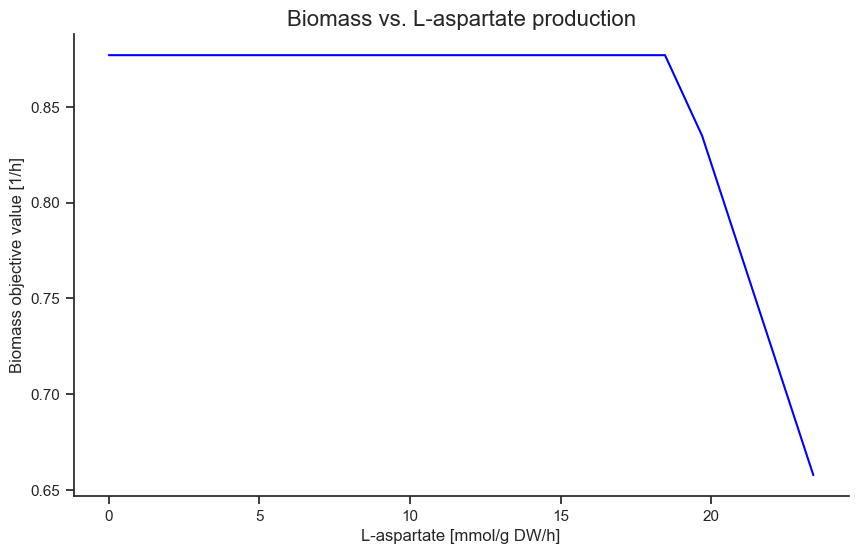

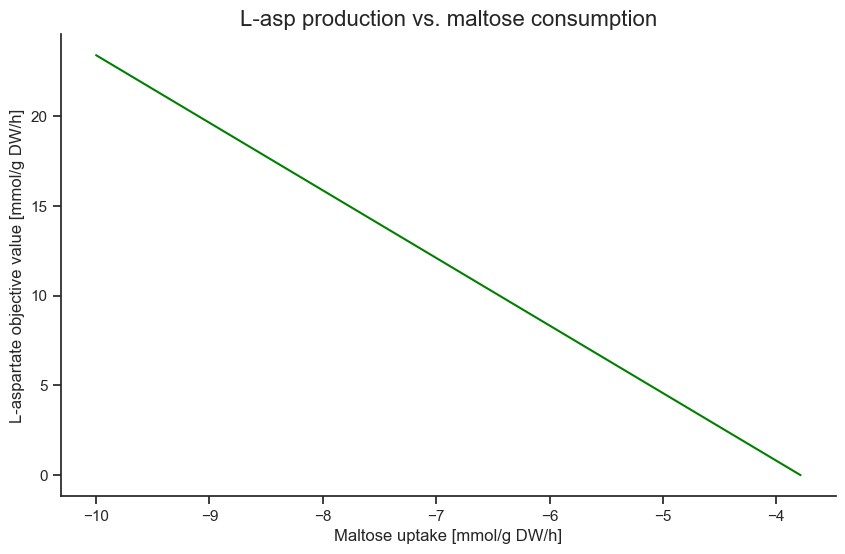

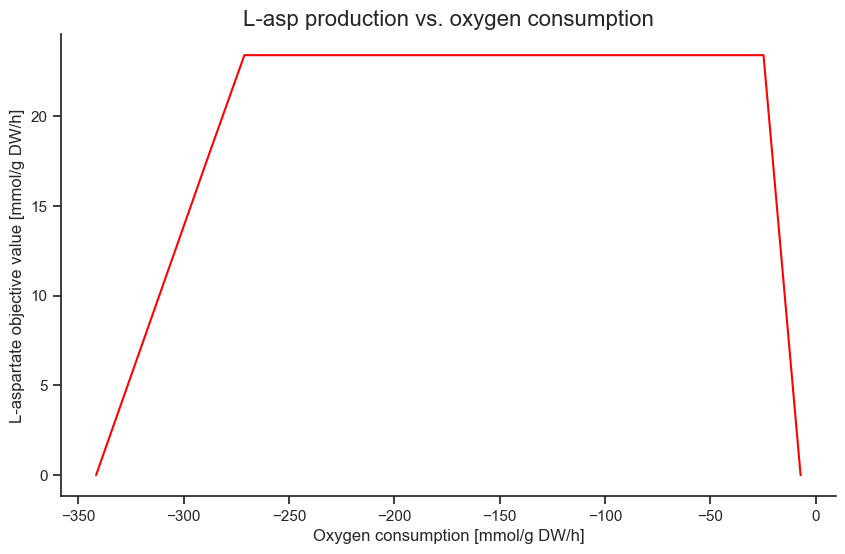

In [8]:
# Set the aesthetic style of the plots
#sns.set_style("whitegrid")
sns.set_theme(style="ticks", context="notebook")

medium = iML1515.medium
with iML1515:
    iML1515.medium = medium
    iML1515.objective = iML1515.reactions.EX_asp__L_e
    Asp_production = iML1515.optimize().objective_value
    ppp_BIOMASS = production_envelope(iML1515, reactions=[iML1515.reactions.EX_asp__L_e], objective=iML1515.reactions.BIOMASS_Ec_iML1515_core_75p37M)
    ppp_asp = production_envelope(iML1515, reactions=[iML1515.reactions.EX_malt_e], objective=iML1515.reactions.EX_asp__L_e)
    ppp_o2 = production_envelope(iML1515, reactions=[iML1515.reactions.EX_o2_e], objective=iML1515.reactions.EX_asp__L_e)


# Plot with Seaborn, given that ppp_BIOMASS, ppp_asp, and ppp_o2 are pandas DataFrames
def plot_seaborn(df, x, y, title, xlabel, ylabel, color):
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(data=df, x=x, y=y, color=color)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    sns.despine()  # Despine the plot for a cleaner look
    plt.show()

# Plot the figures
plot_seaborn(ppp_BIOMASS, 'EX_asp__L_e', 'flux_maximum', 'Biomass vs. L-aspartate production', 'L-aspartate [mmol/g DW/h]', 'Biomass objective value [1/h]', 'blue')
plot_seaborn(ppp_asp, 'EX_malt_e', 'flux_maximum', 'L-asp production vs. maltose consumption', 'Maltose uptake [mmol/g DW/h]', 'L-aspartate objective value [mmol/g DW/h]', 'green')
plot_seaborn(ppp_o2, 'EX_o2_e', 'flux_maximum', 'L-asp production vs. oxygen consumption', 'Oxygen consumption [mmol/g DW/h]', 'L-aspartate objective value [mmol/g DW/h]', 'red')